## Notes for your NLP Project

This notebook will clarify some of the most important concepts you need to know when your dealing with nlp project. Happy learning !!

### Word Embedding 

1. Problem

Given a supervised learning task to predict which tweets are about real disasters and which ones are not (classification). Here the independent variable would be the tweets (text) and the target variable would be the binary values (1: Real Disaster, 0: Not real Disaster).

Now, Machine Learning and Deep Learning algorithms only take numeric input. So, how do we convert tweets to their numeric values? We will dive deep into the techniques to solve such problems, but first let’s look at the solution provided by word embedding.

2. Solution

***Word Embeddings*** in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics. Each word is represented by a real-valued vector with tens or hundreds of dimensions.

### 1. Term frequency-inverse document frequency (TF-IDF)

***Term Frequency-Inverse Document Frequency (TF-IDF)*** is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a term within a document relative to its importance across a collection of documents. TF-IDF is a key concept in document analysis and text mining, helping to identify the significance of words or phrases within a body of text.

Here's a breakdown of the components of TF-IDF:

***Term Frequency (TF):*** This measures how frequently a term (word or phrase) occurs within a specific document. It is calculated by counting the number of times the term appears and is often normalized to account for the document's length, preventing longer documents from having higher TF values.

This term is calculated like this : $$\text{term frequencey (i,j)} =  \frac{{\text{Term i frequency in document } j}}{{\text{Total number of terms in document } j}}
  $$

***Inverse Document Frequency (IDF):*** This evaluates the rarity of a term across a collection of documents. The IDF score is determined by dividing the total number of documents by the number of documents containing the term, followed by applying a logarithmic function. The idea is that terms that appear in fewer documents are more valuable.

This term is calculated like this: $$ \text{Inverse document frequency (i)} = \log({\frac{{\text{Total documents } j}}{{\text{Number of documanets containing term } i}}}) $$

The TF-IDF is calculated using the following formula: $$ \text{term frequencey (i,j)}*\text{Inverse document frequency (i)}$$


## Disadvantages of TF-IDF

While Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used method in natural language processing for information retrieval and text mining, it also has certain limitations. Some disadvantages of TF-IDF include:

* ***Inability to Capture Word Semantics:*** TF-IDF doesn't consider the semantics or meaning of words. It treats each word as an independent entity, disregarding their context or relationships within the text. This might lead to limited accuracy when dealing with the semantics of different words or phrases.

* ***High Dimensionality:*** In datasets with a vast vocabulary or a large number of documents, TF-IDF can generate high-dimensional matrices, leading to computational complexity and memory storage issues.

* ***Sensitivity to Stop Words and Rare Terms:*** Stop words (frequently occurring common words like 'and', 'the', 'of') might be assigned significant weights due to high term frequency but low inverse document frequency. Additionally, rare terms with limited occurrences might not have enough information for TF-IDF to accurately assess their relevance.

* ***Sparsity and Zero Values:*** In sparse datasets, where many terms might not occur frequently in documents, TF-IDF can produce sparse matrices with numerous zero values. This sparsity can impact the performance of some machine learning models and techniques that require dense matrices.

* ***No Word Order or Sequence Information:***  TF-IDF treats documents as a bag of words, disregarding word order and sequence information, which could be crucial in certain NLP tasks like sentiment analysis or language generation.

* ***Dependency on Document Length:*** TF-IDF tends to favor longer documents as they might contain more instances of terms. This could introduce a bias toward longer documents in the analysis.

* ***Unsuitable for Some NLP Tasks:*** In tasks like word embedding or language modeling where a richer representation of words is required, TF-IDF might not be the ideal approach due to its inability to capture complex word relationships and representations.

* ***Not Suitable for Multi-Word Expressions:*** TF-IDF operates on individual words, not considering multi-word expressions or phrases as single entities, limiting its effectiveness in capturing the meaning of multi-word units.



### TF-IDF in Scikit-learn

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus using TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get the feature names (terms) in the order they appear in the matrix
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array
tfidf_matrix_dense = tfidf_matrix.toarray()

# Create a DataFrame for better visualization (optional)
import pandas as pd
df = pd.DataFrame(data=tfidf_matrix_dense, columns=feature_names)



In [2]:
df

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


The rows represent each document, the columns represent the vocabulary, and the values of tf-idf(i,j) are obtained through the above formula. This matrix obtained can be used along with the target variable to train a machine learning/deep learning model.

To see how we can use this method for machine learning or deep learning task i recommend visiting the following [website](https://www.analyticsvidhya.com/blog/2021/09/creating-a-movie-reviews-classifier-using-tf-idf-in-python/) and read the tutorial.

### 2. Bag of words (BOW)
***The "Bag of Words"*** (BoW) is a simple and fundamental technique used in natural language processing (NLP) and text analysis. It's a way to represent text data as a collection of words or tokens, ignoring the order and structure of the words in a document. The name "Bag of Words" suggests that you're treating the text as a "bag" of individual words, with no specific order, grammar, or context, just like counting how many times each word appears in a bag.

Here's how the Bag of Words technique works:

1. ***Tokenization:***  The first step is to break down a text document into individual words or tokens. This process involves removing punctuation and splitting the text into words.
2. ***Vocabulary Building:***  Create a vocabulary that includes all the unique words (tokens) in the entire corpus of documents. Each word in the vocabulary is assigned a unique index.
3. ***Counting Word Occurrences:*** For each document in the corpus, count how many times each word from the vocabulary appears in that document. This creates a numerical representation of the document in the form of a vector, where each dimension corresponds to a word in the vocabulary, and the value in each dimension is the count of that word's occurrence in the document.
4. ***Sparse Representation:*** Since most documents contain only a subset of the words from the vocabulary, the resulting vectors are usually sparse, with many dimensions having a value of zero.

### BOW In Scikit-learn

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
corpus = [
    "The quick brown fox",
    "Jumped over the lazy dog",
    "The brown dog barked"
]

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit and transform the corpus using BoW
bow_matrix = count_vectorizer.fit_transform(corpus)

# Get the feature names (words) in the order they appear in the matrix
feature_names = count_vectorizer.get_feature_names()

# Convert the BoW matrix to a dense array
bow_matrix_dense = bow_matrix.toarray()

# Create a DataFrame for better visualization (optional)
import pandas as pd
df = pd.DataFrame(data=bow_matrix_dense, columns=feature_names)


/home/nabil/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df

,barked,brown,dog,fox,jumped,lazy,over,quick,the
0,0,1,0,1,0,0,0,1,1
1,0,0,1,0,1,1,1,0,1
2,1,1,1,0,0,0,0,0,1


## Word2vec

`Word2Vec` is a popular and widely used word embedding technique in natural language processing (NLP). It was introduced by Tomas Mikolov and his team at Google in 2013. Word2Vec is a neural network-based model that learns to represent words as dense vectors in a continuous vector space. These dense word vectors, also known as word embeddings, capture the semantic and syntactic relationships between words, making them useful for a wide range of NLP tasks.

The key idea behind Word2Vec is the "distributional hypothesis," which suggests that words that appear in similar contexts often have similar meanings. Word2Vec leverages this idea by learning word embeddings from large text corpora using neural networks. There are two primary architectures for Word2Vec:

* ***Continuous Bag of Words (CBOW)***: In the CBOW model, the goal is to predict the target word given the context words. The context words are represented by their word vectors, and the target word is predicted based on these representations.

* ***Skip-gram***: In the skip-gram model, the goal is to predict the context words (words that occur in the neighborhood of the target word) given the target word. The target word is represented by its word vector, and the context words are predicted based on this representation.

Word2Vec models are typically trained on large text corpora, such as Wikipedia, news articles, or web pages. Training Word2Vec models involves adjusting the word vectors so that they accurately predict the words that appear in their contexts.

Once trained, Word2Vec word embeddings can be used for various NLP tasks, including:

* ****Word Similarity****: You can compute the similarity between words by measuring the cosine similarity between their word vectors.

* ****Analogical Reasoning****: Word2Vec enables you to perform word analogy tasks, such as "king - man + woman = queen," by using vector arithmetic.

* ****Text Classification****: Word embeddings can be used as features for text classification tasks, like sentiment analysis or topic classification.

Information Retrieval: Word embeddings can help improve search engine results by capturing semantic relationships between words.

You can use popular libraries like Gensim or TensorFlow to train Word2Vec models. Here's how to do it using Gensim.
In this tutorial we are going to word with the gensim library

In [2]:
pip install --upgrade gensim

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 308.8 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 331.9 kB/s eta 0:00:00 kB/s eta 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from gensim.models import Word2Vec

# Define your corpus
corpus = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
 ['this', 'is', 'the', 'second', 'sentence'],
 ['yet', 'another', 'sentence'],
 ['one', 'more', 'sentence'],
 ['and', 'the', 'final', 'sentence']]

# Initialize and train the Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, sg=1)

# Parameters:
# - `vector_size`: The dimensionality of the word vectors.
# - `window`: The maximum distance between the current and predicted word within a sentence.
# - `min_count`: Ignores all words with a total frequency lower than this.
# - `sg` (Skip-gram): Use the Skip-gram architecture (set to 1).

In [4]:
# summarize the loaded model
print(model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>


In [6]:
# summarize vocabulary
words = list(model.wv.index_to_key)
words 

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

In [10]:
# access vector for one word
vector = model.wv['sentence']
vector

array([-5.3622725e-04,  2.3643016e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588715e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633730e-03,  7.3805046e-03, -1.5334726e-03,
       -4.5366143e-03,  6.5540504e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488189e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508893e-03, -3.4053659e-03, -9.4640255e-04,  5.7685734e-03,
       -7.5216386e-03, -3.9361049e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337698e-03, -1.9377422e-03,
        8.0774352e-03, -5.9308959e-03,  4.5161247e-05, -4.7537349e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595871e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618264e-04, -7.6612402e-03,  9.6147414e-03,
        4.9820566e-03,  9.2331432e-03, -8.1579182e-03,  4.4957972e-03,
       -4.1370774e-03,  8.2453492e-04,  8.4986184e-03, -4.4621779e-03,
      

### Visualize Word Embedding

In [13]:
X = [model.wv[word] for word in words]

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

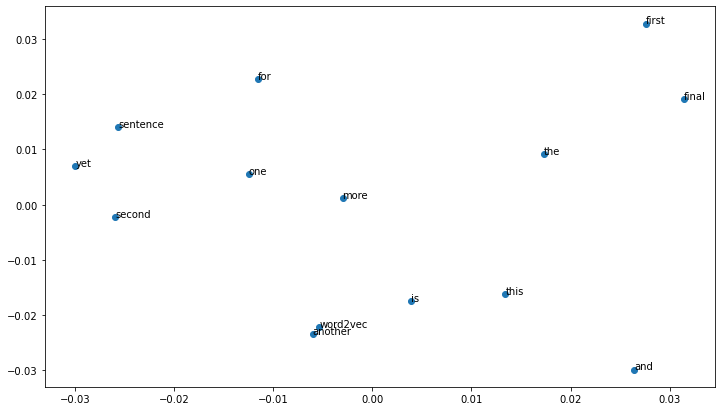

In [19]:
# create a scatter plot of the projection
plt.figure(figsize=(12,7))
import matplotlib.pyplot as plt  
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Spacy

In [1]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 487.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 487.9 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 711.9 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 59.4 kB/s eta 0:00:0031m1.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.6/920.6 kB 811.9 kB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 706.5 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 174.4 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 280.3 kB/s eta 0:00:001m591.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 518.6 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━

After installation, you need to download language models using the spacy download command. For example, to download the English language model, you would run

In [30]:
!python3 -m spacy download en_core_web_lg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB ? eta 0:00:00B/s eta 0:00:010:00:34

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
import spacy

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_lg")

# Process a text
text = "Spacy is a powerful tool for natural language processing fhfdh ."
doc = nlp(text)

# Print the tokens
for token in doc:
    print(token.text)


Spacy
is
a
powerful
tool
for
natural
language
processing
fhfdh
.


In [35]:
for token in doc:
    print(f'the token {token.text} has vector:',token.has_vector, "------ OOV ?: ",token.is_oov)


the token Spacy has vector: True ------ OOV ?:  False
the token is has vector: True ------ OOV ?:  False
the token a has vector: True ------ OOV ?:  False
the token powerful has vector: True ------ OOV ?:  False
the token tool has vector: True ------ OOV ?:  False
the token for has vector: True ------ OOV ?:  False
the token natural has vector: True ------ OOV ?:  False
the token language has vector: True ------ OOV ?:  False
the token processing has vector: True ------ OOV ?:  False
the token fhfdh has vector: False ------ OOV ?:  True
the token . has vector: True ------ OOV ?:  False


In SpaCy, the is_oov method is used to check if a token is out-of-vocabulary (OOV). This method is available on a Token object within a SpaCy Doc. "Out-of-vocabulary" typically refers to a word that is not present in the vocabulary used by the specific language model.

In [37]:
doc[0].vector.shape

(300,)

## Token Similarity

In [39]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_lg")

# Example text
text = "cat dog"

# Process the text
doc = nlp(text)

# Get the tokens for "cat" and "dog"
token_cat = doc[0]  # Get the token for "cat"
token_dog = doc[1]  # Get the token for "dog"

# Calculate similarity between "cat" and "dog"
similarity = token_cat.similarity(token_dog)

print(f"Similarity between 'cat' and 'dog': {similarity}")


Similarity between 'cat' and 'dog': 0.8220816850662231


SpaCy calculates token similarity based on word vectors. Each token in a SpaCy Doc has an associated word vector that represents the word's meaning in a high-dimensional space. This vector is based on the context in which the word appears in the training data used to create the language model.

The similarity between two tokens is computed using the cosine similarity between their word vectors. Cosine similarity measures the cosine of the angle between two non-zero vectors. The formula for cosine similarity between two vectors A and B is:

$$\text{Cosine Similarity} = \frac{{A \cdot B}}{{\|A\| \times \|B\|}}
 $$

Where:

$$A \cdot B $$ represents the dot product of vectors A and B.
$$\|A\|∥A∥ $$ and $$  \|B\|∥B∥ $$ represent the magnitudes (or norms) of vectors A and B, respectively.
In the context of token similarity in SpaCy:

The dot product of the word vectors for two tokens is calculated.
The magnitudes of the individual word vectors are computed.
The dot product is divided by the product of the magnitudes to get the cosine similarity value.
The resulting value of the similarity falls between -1 and 1, with 1 indicating highly similar word vectors, 0 indicating no similarity, and -1 indicating vectors that are dissimilar but in a mirrored sense.

